# Libraries


In [161]:
import pandas as pd
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

# data preprocess

In [162]:
data=pd.read_csv('/Users/vedantgupta/Documents/summer project/data-analysis-with-technical-indicators-2/final/Data_imports/Sensex_2011_to_2023(separated).csv')

In [163]:
#drop the unnamed columns

newdata=data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1)
data['Date'] = pd.to_datetime(data['Date'])

len(data.columns)

123

In [164]:
#make new pandas data fream with every fourth column
newdata1=pd.DataFrame()

for i in range(0,len(newdata.columns),4):
    newdata1[newdata.columns[i]]=newdata[newdata.columns[i]]
newdata1['Date']=newdata['Date']
newdata1.shape
print (len(newdata1))

3204


# MACD function

In [165]:
#function to calculate macd
def MACD(data, short_window, long_window, signal_window, column_name):
   
    data.loc[:,'EMAn'] = data[column_name].ewm(span=short_window, adjust=False).mean()
    data.loc[:,'EMAm'] = data[column_name].ewm(span=long_window, adjust=False).mean()

    for i in range(short_window):
        data.loc[i,'EMAn'] = None
    for i in range(long_window):
        data.loc[i,'EMAm'] = None
    
    data['MACD'] = data['EMAn'] - data['EMAm']
    data['Signal Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

    trade_sig=np.zeros([len(data),1],dtype=float)

    for i in range(long_window+1,len(data)):
        if data.loc[i,'MACD'] > data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] < data.loc[i-1,'Signal Line']:
            trade_sig[i] = 1
        if data.loc[i,'MACD'] < data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] > data.loc[i-1,'Signal Line']:
            trade_sig[i] = -1
        
    trade_sig=trade_sig.reshape(len(trade_sig),1)

    data_numpy=data['Date'].to_numpy()
    data_numpy=data_numpy.reshape(len(data_numpy),1)
    data_numpy=np.column_stack((data_numpy,data[column_name].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAn'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAm'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['MACD'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['Signal Line'].to_numpy()))

    final=np.column_stack((data_numpy,trade_sig))
    final_df=pd.DataFrame(final,columns=['Date','Close','EMAn','EMAm','MACD','Signal Line','Trade Signal'],index=data.index)

    final_df.drop(["EMAn","EMAm","MACD","Signal Line"],axis=1,inplace=True)
    final_df['Date'] = pd.to_datetime(final_df['Date'])
    final_df['Close'] = final_df['Close'].astype(float) 
    final_df['Trade Signal'] = final_df['Trade Signal'].astype(float)

    return final_df

In [166]:
newdata1['Date'] = newdata1['Date'].astype(str)
y=MACD(newdata1, 12, 26, 9, 'M&M.NS(close)')
y

,Date,Close,Trade Signal
0,2011-01-03,354.620422,0.0
1,2011-01-04,351.783600,0.0
2,2011-01-05,347.190735,0.0
3,2011-01-06,347.280792,0.0
4,2011-01-07,333.344513,0.0
...,...,...,...
3199,2023-12-22,1634.250000,0.0
3200,2023-12-26,1662.250000,0.0
3201,2023-12-27,1687.949951,0.0
3202,2023-12-28,1734.449951,0.0


In [167]:
a=MACD(newdata1, 12, 26, 9, 'SUNPHARMA.NS(close)')
b=MACD(newdata1, 12, 26, 9, 'TATAMOTORS.NS(close)')
c=MACD(newdata1, 12, 26, 9, 'TCS.NS(close)')
d=MACD(newdata1, 12, 26, 9, 'TECHM.NS(close)')
e=MACD(newdata1, 12, 26, 9, 'WIPRO.NS(close)')
f=MACD(newdata1, 12, 26, 9, 'HCLTECH.NS(close)')
g=MACD(newdata1, 12, 26, 9, 'INFY.NS(close)')

a.to_csv('/Users/vedantgupta/Documents/summer project/data-analysis-with-technical-indicators-2/all_macd_csv/SUNPHARMA_MACD.csv')


In [168]:
#'MARUTI.NS', 'POWERGRID.NS', 'SBIN.NS', 'AXISBANK.NS', 'ICICIBANK.NS'
h=MACD(newdata1, 12, 26, 9, 'MARUTI.NS(close)')
i=MACD(newdata1, 12, 26, 9, 'POWERGRID.NS(close)')
j=MACD(newdata1, 12, 26, 9, 'SBIN.NS(close)')
k=MACD(newdata1, 12, 26, 9, 'AXISBANK.NS(close)')
l=MACD(newdata1, 12, 26, 9, 'ICICIBANK.NS(close)')

In [169]:
#'RELIANCE.NS', 'JSWSTEEL.NS'

m=MACD(newdata1, 12, 26, 9, 'RELIANCE.NS(close)')
n=MACD(newdata1, 12, 26, 9, 'JSWSTEEL.NS(close)')

In [170]:
#'M&M.NS', 'NESTLEIND.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'ASIANPAINT.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'HDFCBANK.NS', 'HINDUNILVR.NS', 'INDUSINDBK.NS', 'ITC.NS', 'KOTAKBANK.NS'

o=MACD(newdata1, 12, 26, 9, 'NESTLEIND.NS(close)')
p=MACD(newdata1, 12, 26, 9, 'TITAN.NS(close)')
q=MACD(newdata1, 12, 26, 9, 'ULTRACEMCO.NS(close)')
r=MACD(newdata1, 12, 26, 9, 'ASIANPAINT.NS(close)')
s=MACD(newdata1, 12, 26, 9, 'BAJFINANCE.NS(close)')
t=MACD(newdata1, 12, 26, 9, 'BAJAJFINSV.NS(close)')
u=MACD(newdata1, 12, 26, 9, 'HDFCBANK.NS(close)')
v=MACD(newdata1, 12, 26, 9, 'HINDUNILVR.NS(close)')
w=MACD(newdata1, 12, 26, 9, 'INDUSINDBK.NS(close)')
x=MACD(newdata1, 12, 26, 9, 'ITC.NS(close)')
z=MACD(newdata1, 12, 26, 9, 'KOTAKBANK.NS(close)')



# plots for clusters with Affinity propagation

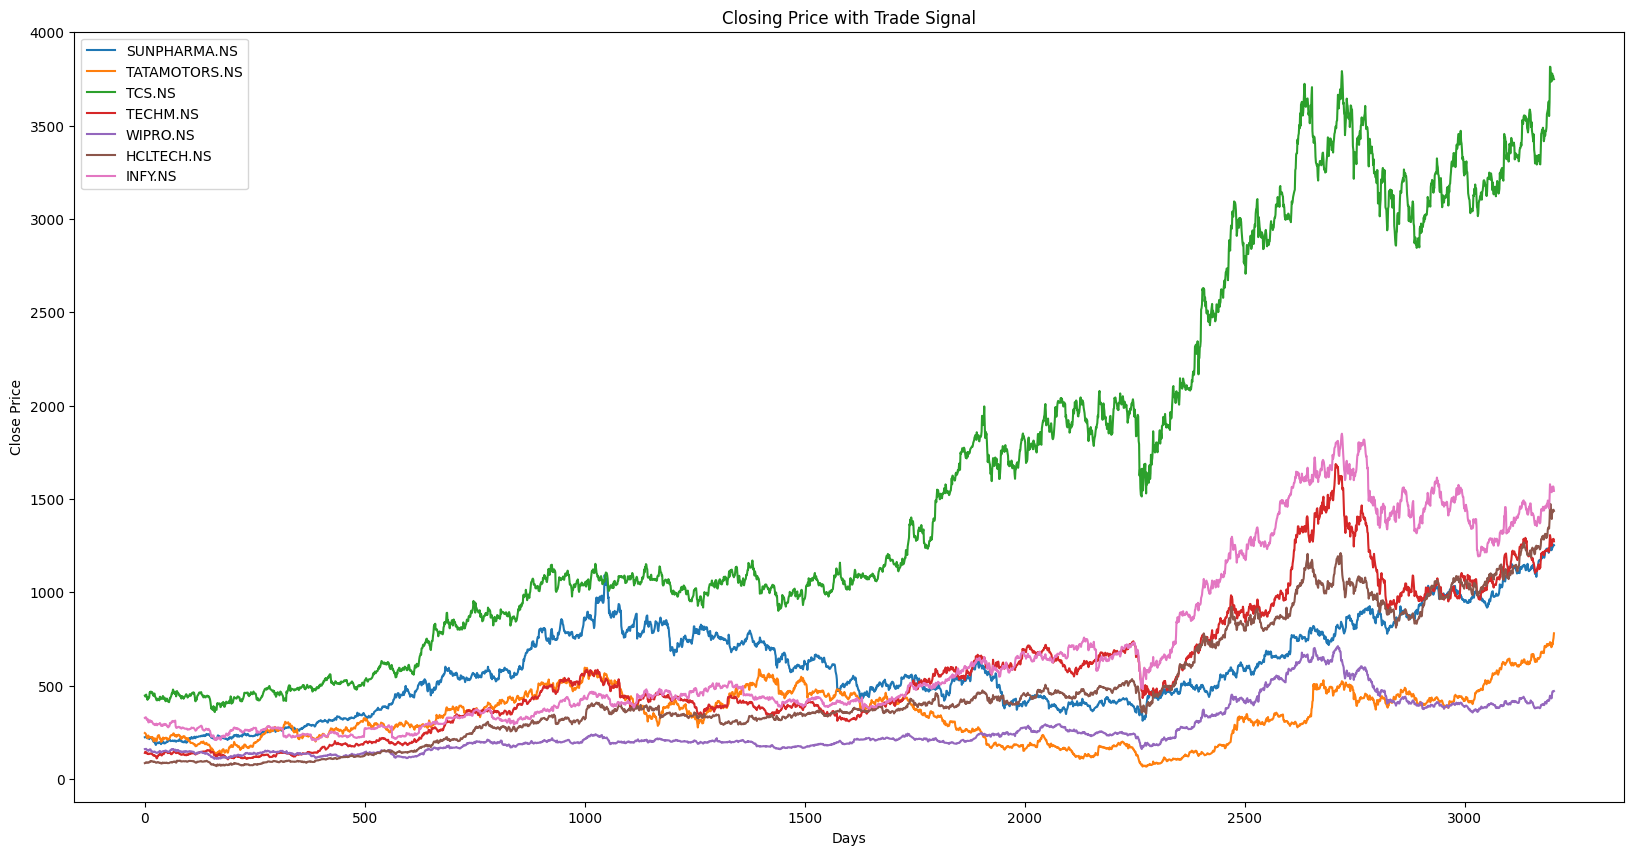

In [171]:
# plot trade points in  macd for 'SUNPHARMA.NS', 'TATAMOTORS.NS', 'TCS.NS', 'TECHM.NS', 'WIPRO.NS', 'HCLTECH.NS', 'INFY.NS'

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(a['Close'],label='SUNPHARMA.NS')
plt.plot(b['Close'],label='TATAMOTORS.NS')
plt.plot(c['Close'],label='TCS.NS')
plt.plot(d['Close'],label='TECHM.NS')
plt.plot(e['Close'],label='WIPRO.NS')
plt.plot(f['Close'],label='HCLTECH.NS')
plt.plot(g['Close'],label='INFY.NS')
plt.legend()

#plt.plot(a.index,a['Close'],'-^', markevery=[i for i in range(len(a)) if a['Trade Signal'][i] == 1], ms=5, color='g')
#plt.plot(a.index,a['Close'],'-v', markevery=[i for i in range(len(a)) if a['Trade Signal'][i] == -1], ms=5, color='r')

#plt.plot(b.index,b['Close'],'-^', markevery=[i for i in range(len(b)) if b['Trade Signal'][i] == 1], ms=5, color='g')
#plt.plot(b.index,b['Close'],'-v', markevery=[i for i in range(len(b)) if b['Trade Signal'][i] == -1], ms=5, color='r')

#plt.plot(c.index,c['Close'],'-^', markevery=[i for i in range(len(c)) if c['Trade Signal'][i] == 1], ms=5, color='g')
#plt.plot(c.index,c['Close'],'-v', markevery=[i for i in range(len(c)) if c['Trade Signal'][i] == -1], ms=5, color='r')

#plt.plot(d.index,d['Close'],'-^', markevery=[i for i in range(len(d)) if d['Trade Signal'][i] == 1], ms=5, color='g')
#plt.plot(d.index,d['Close'],'-v', markevery=[i for i in range(len(d)) if d['Trade Signal'][i] == -1], ms=5, color='r')

##plt.plot(e.index,e['Close'],'-^', markevery=[i for i in range(len(e)) if e['Trade Signal'][i] == 1], ms=5, color='g')
#plt.plot(e.index,e['Close'],'-v', markevery=[i for i in range(len(e)) if e['Trade Signal'][i] == -1], ms=5, color='r')

#plt.plot(f.index,f['Close'],'-^', markevery=[i for i in range(len(f)) if f['Trade Signal'][i] == 1], ms=5, color='g')
#plt.plot(f.index,f['Close'],'-v', markevery=[i for i in range(len(f)) if f['Trade Signal'][i] == -1], ms=5, color='r')

#plt.plot(g.index,g['Close'],'-^', markevery=[i for i in range(len(g)) if g['Trade Signal'][i] == 1], ms=5, color='g')
#plt.plot(g.index,g['Close'],'-v', markevery=[i for i in range(len(g)) if g['Trade Signal'][i] == -1], ms=5, color='r')

plt.title('Closing Price with Trade Signal')
plt.xlabel('Days')
plt.ylabel('Close Price')

plt.show()

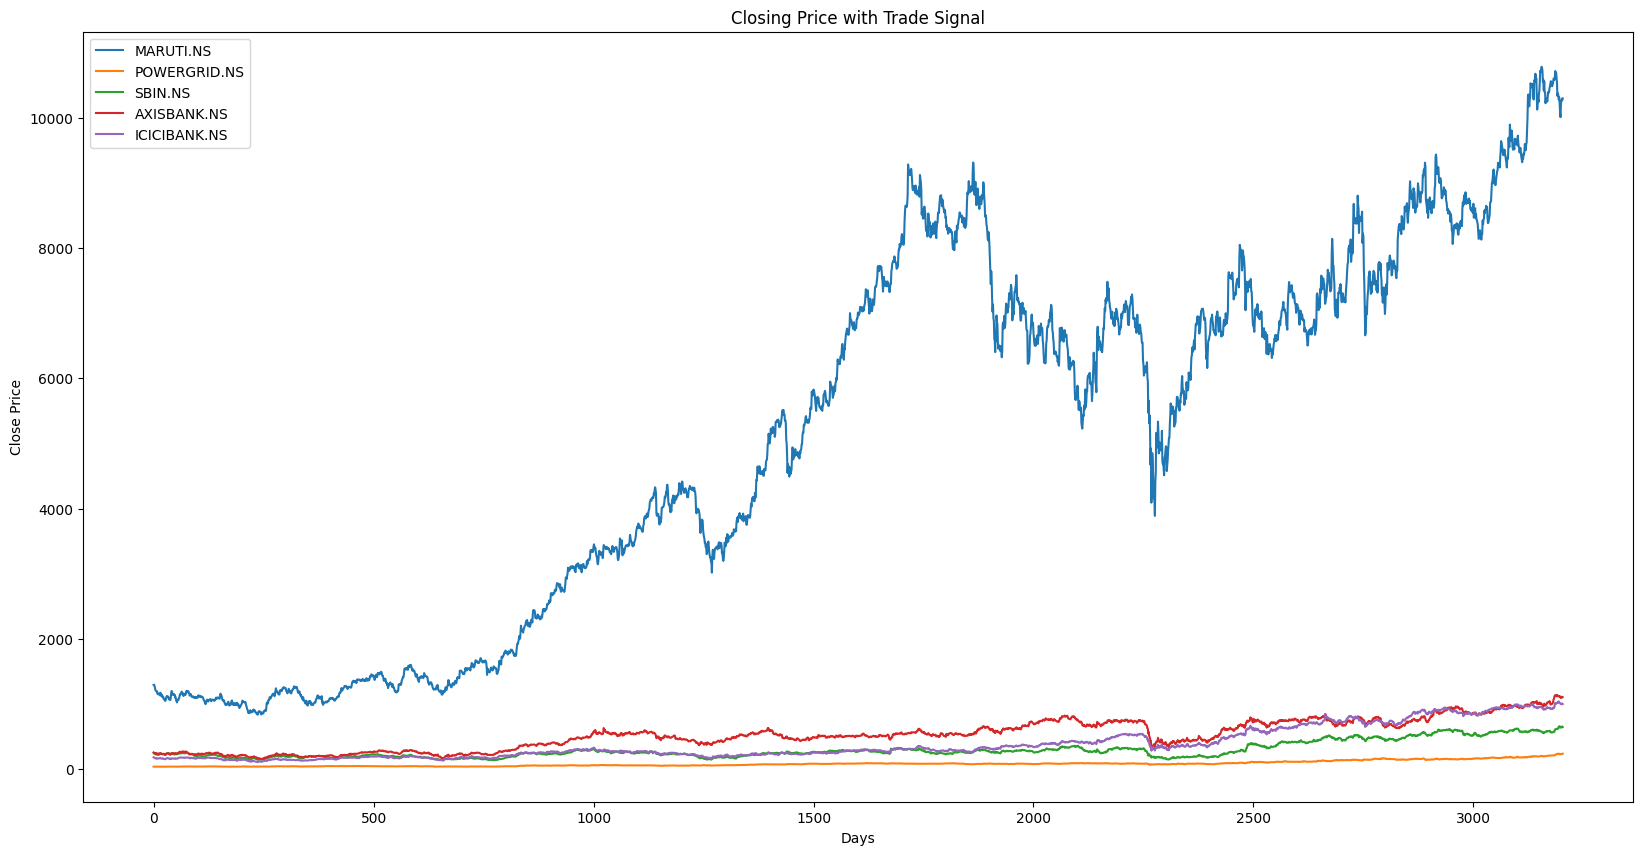

In [172]:
# plot trade points in  macd for 'MARUTI.NS', 'POWERGRID.NS', 'SBIN.NS', 'AXISBANK.NS', 'ICICIBANK.NS'

plt.figure(figsize=(20,10))
plt.plot(h['Close'],label='MARUTI.NS')
plt.plot(i['Close'],label='POWERGRID.NS')
plt.plot(j['Close'],label='SBIN.NS')
plt.plot(k['Close'],label='AXISBANK.NS')
plt.plot(l['Close'],label='ICICIBANK.NS')
plt.legend()

#plt.plot(h.index,h['Close'],'-^', markevery=[i for i in range(len(h)) if h['Trade Signal'][i] == 1], ms=5, color='g')
#plt.plot(h.index,h['Close'],'-v', markevery=[i for i in range(len(h)) if h['Trade Signal'][i] == -1], ms=5, color='r')

#plt.plot(i.index,i['Close'],'-^', markevery=[i for i in range(len(i)) if i['Trade Signal'][i] == 1], ms=5, color='g')
#plt.plot(i.index,i['Close'],'-v', markevery=[i for i in range(len(i)) if i['Trade Signal'][i] == -1], ms=5, color='r')

#plt.plot(j.index,j['Close'],'-^', markevery=[i for i in range(len(j)) if j['Trade Signal'][i] == 1], ms=5, color='g')
#plt.plot(j.index,j['Close'],'-v', markevery=[i for i in range(len(j)) if j['Trade Signal'][i] == -1], ms=5, color='r')

#plt.plot(k.index,k['Close'],'-^', markevery=[i for i in range(len(k)) if k['Trade Signal'][i] == 1], ms=5, color='g')
#plt.plot(k.index,k['Close'],'-v', markevery=[i for i in range(len(k)) if k['Trade Signal'][i] == -1], ms=5, color='r')

#plt.plot(l.index,l['Close'],'-^', markevery=[i for i in range(len(l)) if l['Trade Signal'][i] == 1], ms=5, color='g')
#plt.plot(l.index,l['Close'],'-v', markevery=[i for i in range(len(l)) if l['Trade Signal'][i] == -1], ms=5, color='r')

plt.title('Closing Price with Trade Signal')
plt.xlabel('Days')
plt.ylabel('Close Price')

plt.show()

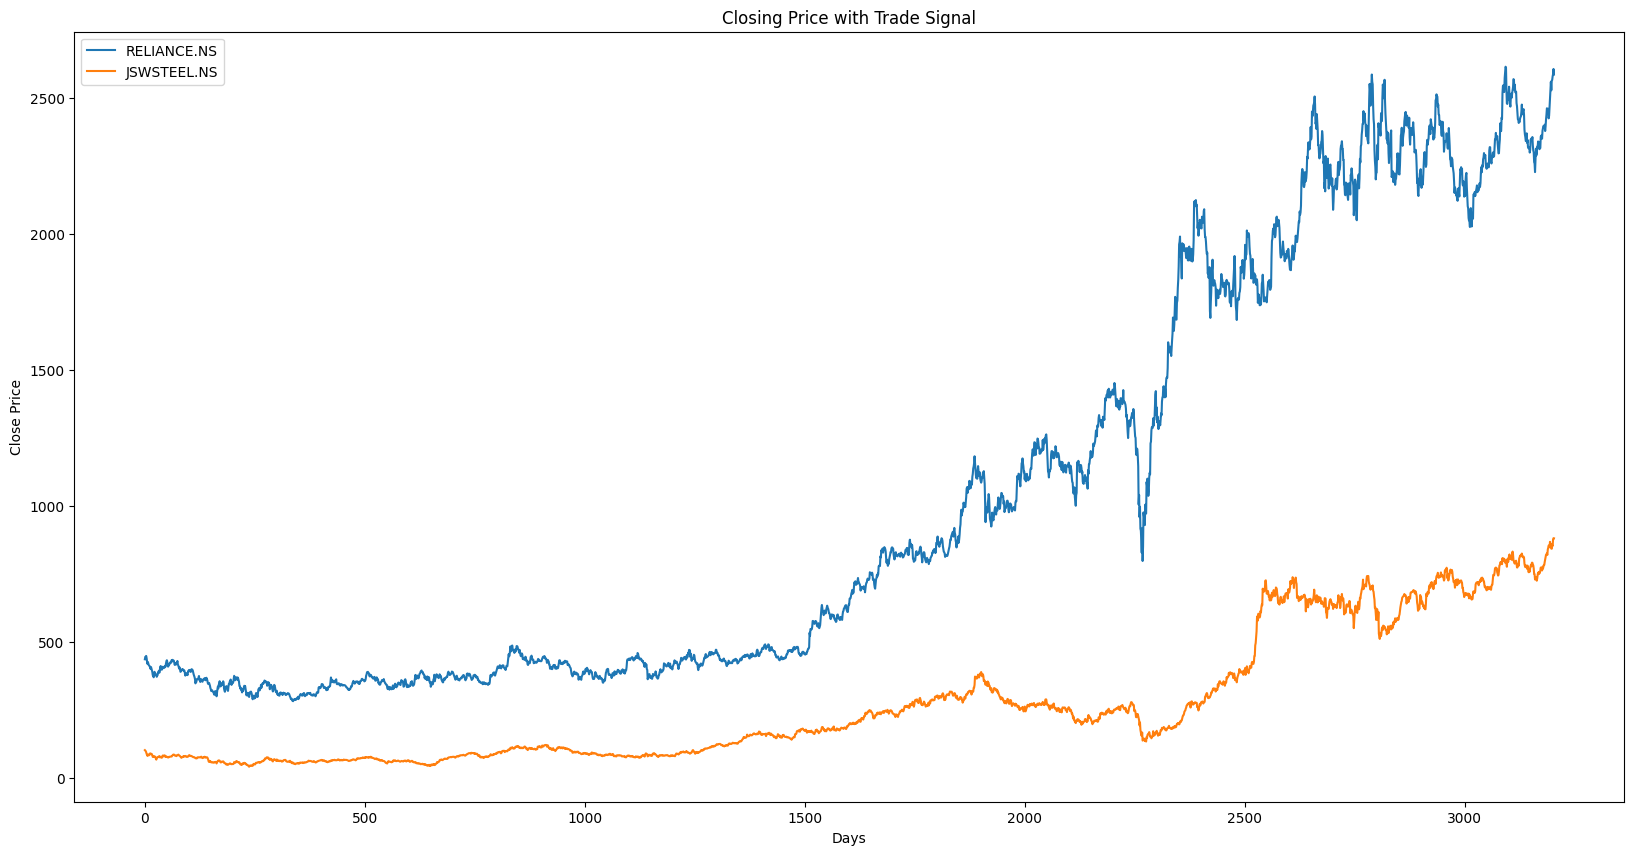

In [173]:
# plot trade points in  macd for 'RELIANCE.NS', 'JSWSTEEL.NS'

plt.figure(figsize=(20,10))
plt.plot(m['Close'],label='RELIANCE.NS')
plt.plot(n['Close'],label='JSWSTEEL.NS')
plt.legend()

#plt.plot(m.index,m['Close'],'-^', markevery=[i for i in range(len(m)) if m['Trade Signal'][i] == 1], ms=5, color='g')
#plt.plot(m.index,m['Close'],'-v', markevery=[i for i in range(len(m)) if m['Trade Signal'][i] == -1], ms=5, color='r')

#plt.plot(n.index,n['Close'],'-^', markevery=[i for i in range(len(n)) if n['Trade Signal'][i] == 1], ms=5, color='g')
#plt.plot(n.index,n['Close'],'-v', markevery=[i for i in range(len(n)) if n['Trade Signal'][i] == -1], ms=5, color='r')

plt.title('Closing Price with Trade Signal')
plt.xlabel('Days')
plt.ylabel('Close Price')

plt.show()

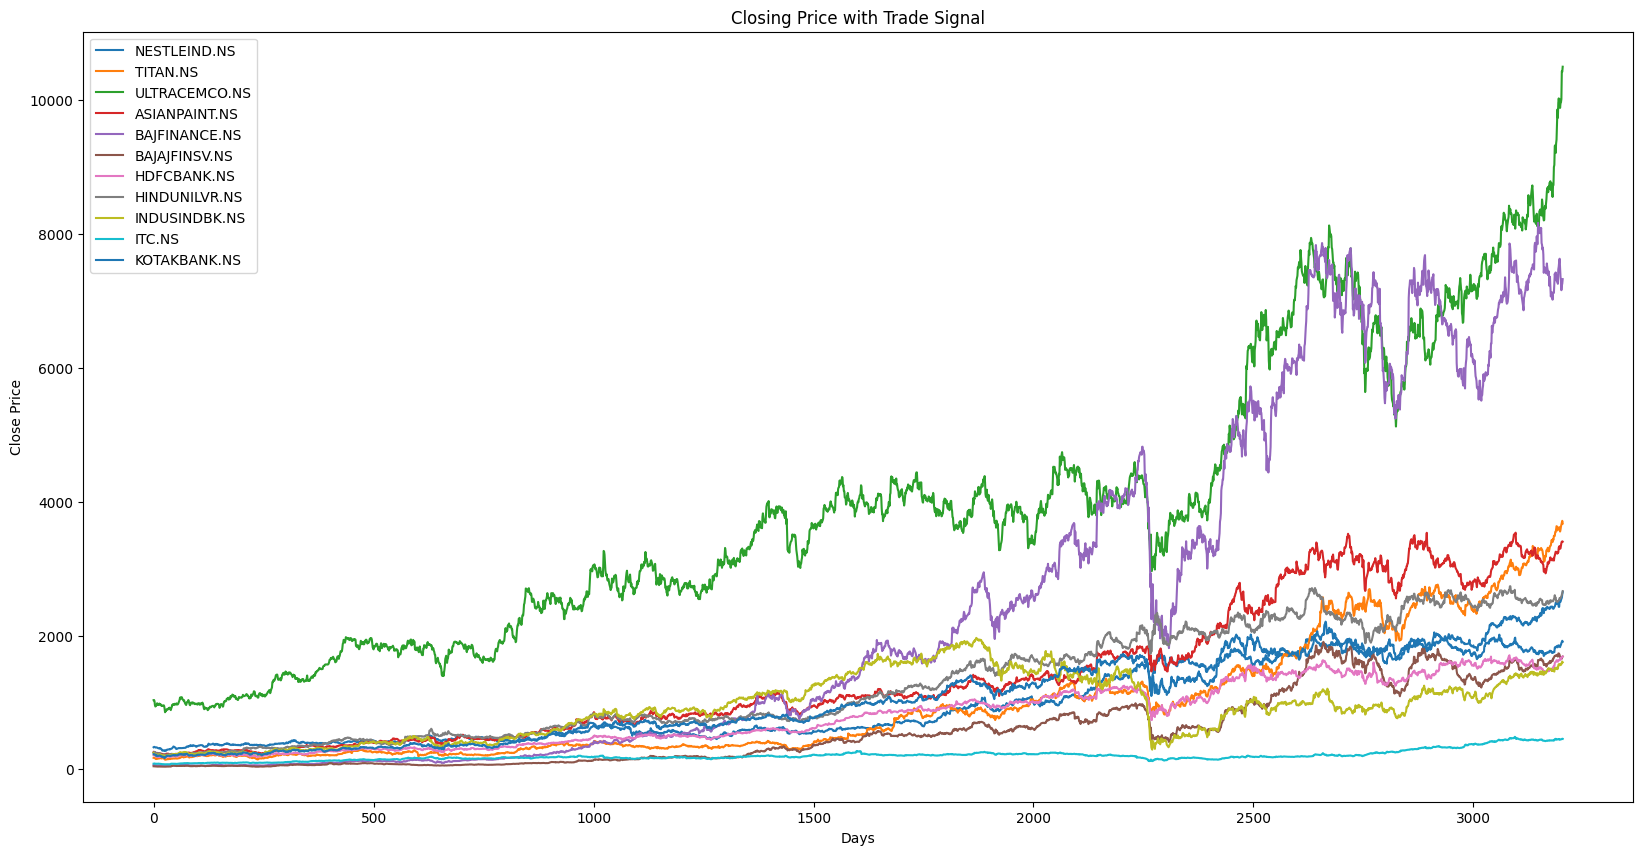

In [174]:
# plot trade points in  macd for 'M&M.NS', 'NESTLEIND.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'ASIANPAINT.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'HDFCBANK.NS', 'HINDUNILVR.NS', 'INDUSINDBK.NS', 'ITC.NS', 'KOTAKBANK.NS'

plt.figure(figsize=(20,10))
plt.plot(o['Close'],label='NESTLEIND.NS')
plt.plot(p['Close'],label='TITAN.NS')
plt.plot(q['Close'],label='ULTRACEMCO.NS')
plt.plot(r['Close'],label='ASIANPAINT.NS')
plt.plot(s['Close'],label='BAJFINANCE.NS')
plt.plot(t['Close'],label='BAJAJFINSV.NS')
plt.plot(u['Close'],label='HDFCBANK.NS')
plt.plot(v['Close'],label='HINDUNILVR.NS')
plt.plot(w['Close'],label='INDUSINDBK.NS')
plt.plot(x['Close'],label='ITC.NS')
plt.plot(z['Close'],label='KOTAKBANK.NS')
plt.legend()

#plt.plot(o.index,o['Close'],'-^', markevery=[i for i in range(len(o)) if o['Trade Signal'][i] == 1], ms=5, color='g')
#plt.plot(o.index,o['Close'],'-v', markevery=[i for i in range(len(o)) if o['Trade Signal'][i] == -1], ms=5, color='r')

#plt.plot(p.index,p['Close'],'-^', markevery=[i for i in range(len(p)) if p['Trade Signal'][i] == 1], ms=5, color='g')
#plt.plot(p.index,p['Close'],'-v', markevery=[i for i in range(len(p)) if p['Trade Signal'][i] == -1], ms=5, color='r')

#plt.plot(q.index,q['Close'],'-^', markevery=[i for i in range(len(q)) if q['Trade Signal'][i] == 1], ms=5, color='g')
#plt.plot(q.index,q['Close'],'-v', markevery=[i for i in range(len(q)) if q['Trade Signal'][i] == -1], ms=5, color='r')

#plt.plot(r.index,r['Close'],'-^', markevery=[i for i in range(len(r)) if r['Trade Signal'][i] == 1], ms=5, color='g')
#plt.plot(r.index,r['Close'],'-v', markevery=[i for i in range(len(r)) if r['Trade Signal'][i] == -1], ms=5, color='r')

#plt.plot(s.index,s['Close'],'-^', markevery=[i for i in range(len(s)) if s['Trade Signal'][i] == 1], ms=5, color='g')
#plt.plot(s.index,s['Close'],'-v', markevery=[i for i in range(len(s)) if s['Trade Signal'][i] == -1], ms=5, color='r')

#plt.plot(t.index,t['Close'],'-^', markevery=[i for i in range(len(t)) if t['Trade Signal'][i] == 1], ms=5, color='g')
#plt.plot(t.index,t['Close'],'-v', markevery=[i for i in range(len(t)) if t['Trade Signal'][i] == -1], ms=5, color='r')

#plt.plot(u.index,u['Close'],'-^', markevery=[i for i in range(len(u)) if u['Trade Signal'][i] == 1], ms=5, color='g')
#plt.plot(u.index,u['Close'],'-v', markevery=[i for i in range(len(u)) if u['Trade Signal'][i] == -1], ms=5, color='r')

#plt.plot(v.index,v['Close'],'-^', markevery=[i for i in range(len(v)) if v['Trade Signal'][i] == 1], ms=5, color='g')
#plt.plot(v.index,v['Close'],'-v', markevery=[i for i in range(len(v)) if v['Trade Signal'][i] == -1], ms=5, color='r')

#plt.plot(w.index,w['Close'],'-^', markevery=[i for i in range(len(w)) if w['Trade Signal'][i] == 1], ms=5, color='g')
#plt.plot(w.index,w['Close'],'-v', markevery=[i for i in range(len(w)) if w['Trade Signal'][i] == -1], ms=5, color='r')

#plt.plot(x.index,x['Close'],'-^', markevery=[i for i in range(len(x)) if x['Trade Signal'][i] == 1], ms=5, color='g')
#plt.plot(x.index,x['Close'],'-v', markevery=[i for i in range(len(x)) if x['Trade Signal'][i] == -1], ms=5, color='r')

#plt.plot(z.index,z['Close'],'-^', markevery=[i for i in range(len(z)) if z['Trade Signal'][i] == 1], ms=5, color='g')
#plt.plot(z.index,z['Close'],'-v', markevery=[i for i in range(len(z)) if z['Trade Signal'][i] == -1], ms=5, color='r')

plt.title('Closing Price with Trade Signal')
plt.xlabel('Days')
plt.ylabel('Close Price')

plt.show()